In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from skimage import measure
from skimage.morphology import dilation, erosion, star
from skimage.transform import resize
import tifffile
from tqdm import tqdm

# Panel 3.a: inset of 60x raw with DAPI in blue, FISH dots in magenta, nuclear contour in yellow.

In [2]:
raw_image_folder_path = "/mnt/data/Imaging/202105-Deconwolf/data_210726/60x_raw"
mask_folder_path = "../../data/60x_mask/dilated_labels_watershed"
current_field_id = 1

In [3]:
a647_max_z_proj = tifffile.imread(os.path.join(raw_image_folder_path, f"a647_{current_field_id:03d}.tif")).max(0)
dapi_sum_z_proj = tifffile.imread(os.path.join(raw_image_folder_path, f"dapi_{current_field_id:03d}.tif")).sum(0)
labels = tifffile.imread(os.path.join(mask_folder_path, f"a647_{current_field_id:03d}.dilated_labels.tiff")).reshape(a647_max_z_proj.shape)

In [4]:
contour_mask = np.zeros(labels.shape)
for lid in tqdm(range(1, labels.max()), desc="nucleus"):
    contours_coords = np.array(measure.find_contours(labels == lid, 0.8))[0].astype("i")
    contour_mask[contours_coords[:,0], contours_coords[:,1]] = 1

nucleus: 100%|██████████| 180/180 [00:11<00:00, 15.71it/s]


In [5]:
square_side = 400
x_start = 900
y_start = 1300

x_slice = slice(x_start, (x_start+square_side))
y_slice = slice(y_start, (y_start+square_side))

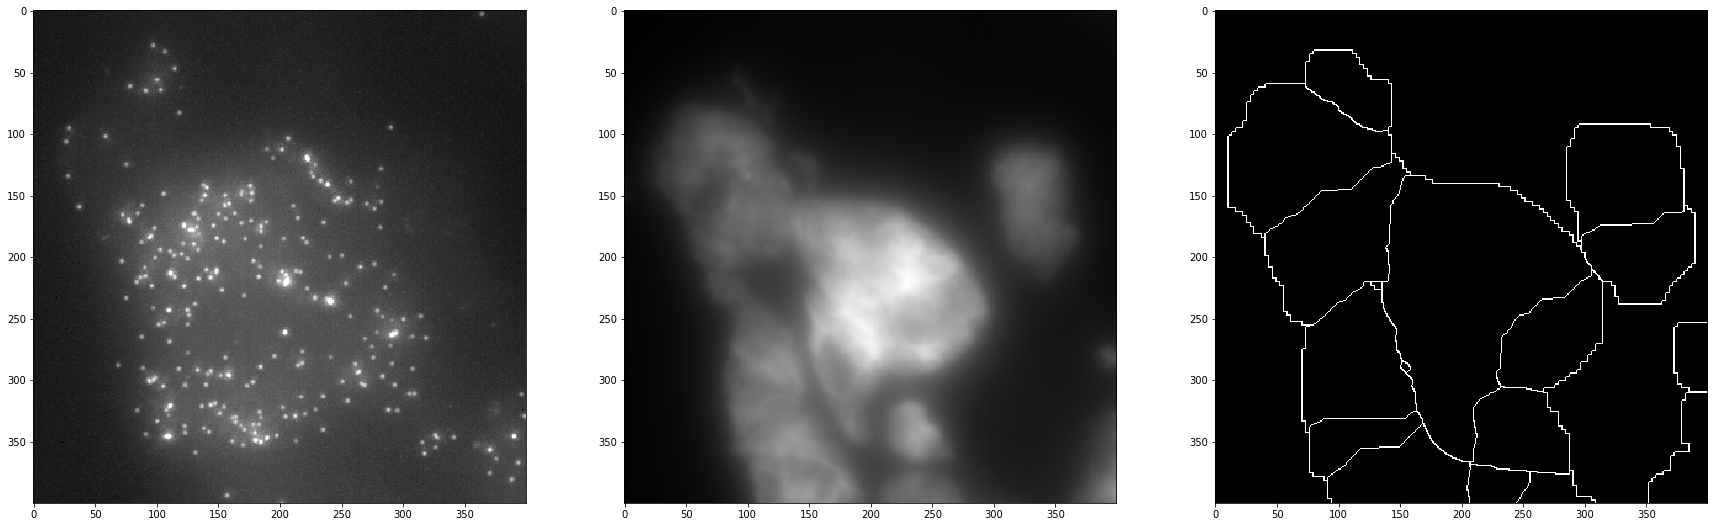

In [6]:
fig, ax = plt.subplots(figsize=(30, 10), ncols=3)
ax[0].imshow(a647_max_z_proj[y_slice, x_slice], cmap="gray", interpolation="none", resample=False, filternorm=False)
ax[1].imshow(dapi_sum_z_proj[y_slice, x_slice], cmap="gray", interpolation="none", resample=False, filternorm=False)
ax[2].imshow(contour_mask[y_slice, x_slice], cmap="gray", interpolation="none", resample=False, filternorm=False)

In [7]:
a647_inset = a647_max_z_proj[y_slice, x_slice]
tifffile.imwrite("insets/60x.raw.a647.001.inset.tiff", a647_inset.astype("uint16"))
dapi_inset = dapi_sum_z_proj[y_slice, x_slice]
tifffile.imwrite("insets/60x.raw.dapi.001.inset.tiff", dapi_inset.astype("uint16"))
cont_inset = contour_mask[y_slice, x_slice]
tifffile.imwrite("insets/60x.raw.contours.001.inset.tiff", cont_inset.astype("uint16"))

In [8]:
x_coords, y_coords = np.meshgrid(range(1, square_side+1), range(1, square_side+1), indexing="ij")

In [9]:
pd.DataFrame(
    dict(
        x=x_coords.flatten(),
        y=y_coords.flatten(),
        a647=a647_inset.flatten().astype("f"),
        dapi=dapi_inset.flatten().astype("f"),
        cont=cont_inset.flatten().astype("f"))
    ).to_csv("insets/60x.raw.data.tsv.gz", index=False)

# Panel 3.b: inset of 60x DW with DAPI in blue, FISH dots in magenta, nuclear contour in yellow.

In [10]:
raw_image_folder_path = "/mnt/data/Imaging/202105-Deconwolf/data_210726/60x_dw"
mask_folder_path = "../../data/60x_mask/dilated_labels_watershed"
current_field_id = 1

In [11]:
a647_max_z_proj = tifffile.imread(os.path.join(raw_image_folder_path, f"a647_{current_field_id:03d}.tif")).max(0)
dapi_sum_z_proj = tifffile.imread(os.path.join(raw_image_folder_path, f"dapi_{current_field_id:03d}.tif")).sum(0)
cont_inset = tifffile.imread("insets/60x.raw.contours.001.inset.tiff")

In [12]:
square_side = 400
x_start = 900
y_start = 1300

x_slice = slice(x_start, (x_start+square_side))
y_slice = slice(y_start, (y_start+square_side))

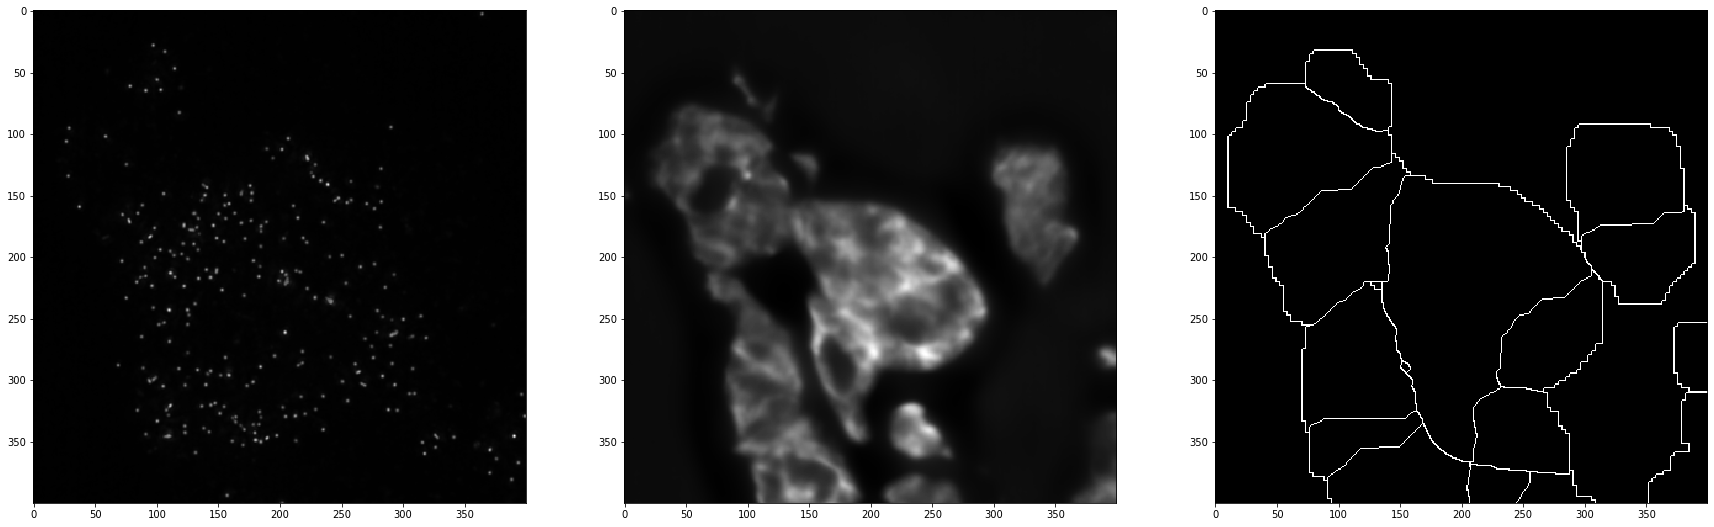

In [13]:
fig, ax = plt.subplots(figsize=(30, 10), ncols=3)
ax[0].imshow(a647_max_z_proj[y_slice, x_slice], cmap="gray", interpolation="none", resample=False, filternorm=False)
ax[1].imshow(dapi_sum_z_proj[y_slice, x_slice], cmap="gray", interpolation="none", resample=False, filternorm=False)
ax[2].imshow(cont_inset, cmap="gray", interpolation="none", resample=False, filternorm=False)

In [14]:
a647_inset = a647_max_z_proj[y_slice, x_slice]
tifffile.imwrite("insets/60x.dw.a647.001.inset.tiff", a647_inset.astype("uint16"))
dapi_inset = dapi_sum_z_proj[y_slice, x_slice]
tifffile.imwrite("insets/60x.dw.dapi.001.inset.tiff", dapi_inset.astype("uint16"))

In [15]:
x_coords, y_coords = np.meshgrid(range(1, square_side+1), range(1, square_side+1), indexing="ij")

In [16]:
pd.DataFrame(
    dict(
        x=x_coords.flatten(),
        y=y_coords.flatten(),
        a647=a647_inset.flatten().astype("f"),
        dapi=dapi_inset.flatten().astype("f"),
        cont=cont_inset.flatten().astype("f"))
    ).to_csv("insets/60x.dw.data.tsv.gz", index=False)

# Panel 3.c: inset of 20x raw with DAPI in blue, FISH dots in magenta, nuclear contour in yellow.

In [17]:
raw_image_folder_path = "/mnt/data/Imaging/202105-Deconwolf/data_210726/20x_raw"
mask_folder_path = "../../data/20x_mask/dilated_labels_watershed_from60x"
current_field_id = 1

In [18]:
a647_max_z_proj = tifffile.imread(os.path.join(raw_image_folder_path, f"a647_{current_field_id:03d}.tif")).max(0)
dapi_sum_z_proj = tifffile.imread(os.path.join(raw_image_folder_path, f"dapi_{current_field_id:03d}.tif")).sum(0)

In [19]:
square_side = int(np.floor(400/3))
x_start = int(np.floor(900/3))
y_start = int(np.floor(1300/3))

x_slice = slice(x_start, (x_start+square_side))
y_slice = slice(y_start, (y_start+square_side))

In [20]:
cont_inset = erosion(resize(dilation(tifffile.imread("insets/60x.raw.contours.001.inset.tiff"), star(1)),
                    (square_side, square_side), preserve_range=True, anti_aliasing=False), star(0))

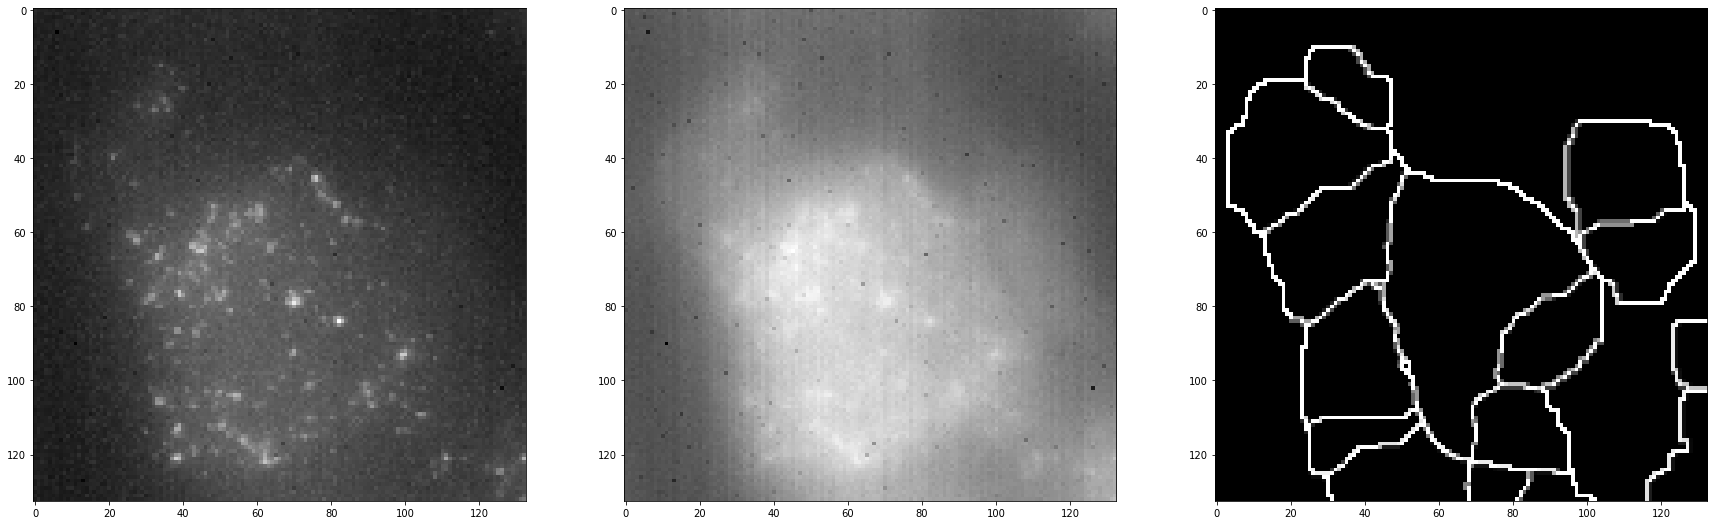

In [21]:
fig, ax = plt.subplots(figsize=(30, 10), ncols=3)
ax[0].imshow(a647_max_z_proj[y_slice, x_slice], cmap="gray", interpolation="none", resample=False, filternorm=False)
ax[1].imshow(dapi_sum_z_proj[y_slice, x_slice], cmap="gray", interpolation="none", resample=False, filternorm=False)
ax[2].imshow(cont_inset, cmap="gray", interpolation="none", resample=False, filternorm=False)

In [22]:
a647_inset = a647_max_z_proj[y_slice, x_slice]
tifffile.imwrite("insets/20x.raw.a647.001.inset.tiff", a647_inset.astype("uint16"))
dapi_inset = dapi_sum_z_proj[y_slice, x_slice]
tifffile.imwrite("insets/20x.raw.dapi.001.inset.tiff", dapi_inset.astype("uint16"))

In [23]:
x_coords, y_coords = np.meshgrid(range(1, square_side+1), range(1, square_side+1), indexing="ij")

In [24]:
pd.DataFrame(
    dict(
        x=x_coords.flatten(),
        y=y_coords.flatten(),
        a647=a647_inset.flatten().astype("f"),
        dapi=dapi_inset.flatten().astype("f"),
        cont=cont_inset.flatten().astype("f"))
    ).to_csv("insets/20x.raw.data.tsv.gz", index=False)

# Panel 3.d: inset of 20x dw with DAPI in blue, FISH dots in magenta, nuclear contour in yellow.

In [25]:
raw_image_folder_path = "/mnt/data/Imaging/202105-Deconwolf/data_210726/20x_dw"
mask_folder_path = "../../data/20x_mask/dilated_labels_watershed_from60x"
current_field_id = 1

In [26]:
a647_max_z_proj = tifffile.imread(os.path.join(raw_image_folder_path, f"a647_{current_field_id:03d}.tif")).max(0)
dapi_sum_z_proj = tifffile.imread(os.path.join(raw_image_folder_path, f"dapi_{current_field_id:03d}.tif")).sum(0)

In [27]:
square_side = int(np.floor(400/3))
x_start = int(np.floor(900/3))
y_start = int(np.floor(1300/3))

x_slice = slice(x_start, (x_start+square_side))
y_slice = slice(y_start, (y_start+square_side))

In [28]:
cont_inset = erosion(resize(dilation(tifffile.imread("insets/60x.raw.contours.001.inset.tiff"), star(1)),
                    (square_side, square_side), preserve_range=True, anti_aliasing=False), star(0))

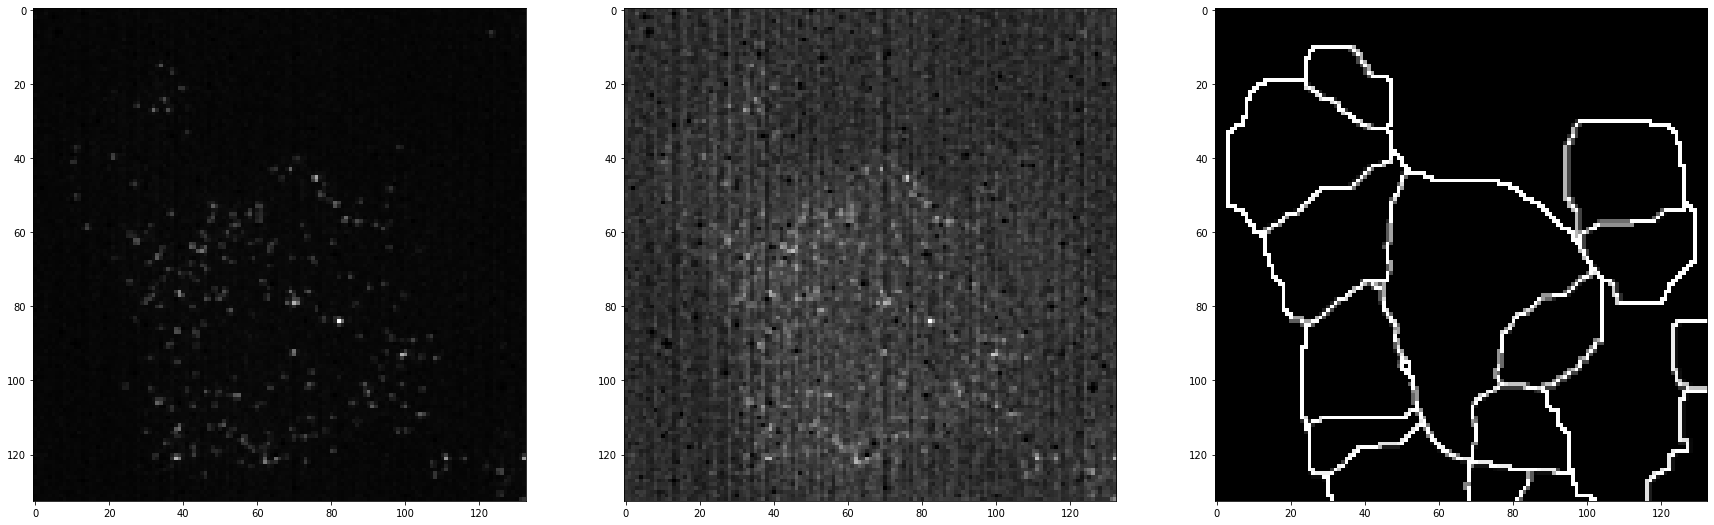

In [29]:
fig, ax = plt.subplots(figsize=(30, 10), ncols=3)
ax[0].imshow(a647_max_z_proj[y_slice, x_slice], cmap="gray", interpolation="none", resample=False, filternorm=False)
ax[1].imshow(dapi_sum_z_proj[y_slice, x_slice], cmap="gray", interpolation="none", resample=False, filternorm=False)
ax[2].imshow(cont_inset, cmap="gray", interpolation="none", resample=False, filternorm=False)

In [30]:
a647_inset = a647_max_z_proj[y_slice, x_slice]
tifffile.imwrite("insets/20x.dw.a647.001.inset.tiff", a647_inset.astype("uint16"))
dapi_inset = dapi_sum_z_proj[y_slice, x_slice]
tifffile.imwrite("insets/20x.dw.dapi.001.inset.tiff", dapi_inset.astype("uint16"))

In [31]:
x_coords, y_coords = np.meshgrid(range(1, square_side+1), range(1, square_side+1), indexing="ij")

In [32]:
pd.DataFrame(
    dict(
        x=x_coords.flatten(),
        y=y_coords.flatten(),
        a647=a647_inset.flatten().astype("f"),
        dapi=dapi_inset.flatten().astype("f"),
        cont=cont_inset.flatten().astype("f"))
    ).to_csv("insets/20x.dw.data.tsv.gz", index=False)